# 2 NumPy 与 PyTorch

NumPy 是 Python 的科学计算包,它有以下功能:

- 是一个包含多维数组对象的库,以及用于对这些数组进行数学运算的函数。
- 数组对象在不同的维度上具有相同的数据类型。这使得 NumPy 非常适合用于线性代数,随机数生成等数值运算。
- NumPy 运行速度快,因为它的底层由C语言编写。

NumPy 提供了底层的数字数组结构和运算,是科学计算的基础包。而 PyTorch 在 NumPy 的基础上构建,并且扩展到深度学习领域,提供更多高级工具和功能:

- PyTorch 的 tensor (张量) 对象类似于 NumPy 的 ndarray 对象,都代表多维数组。
- PyTorch 的 tensor 支持 GPU 加速,NumPy 的 ndarray 只支持 CPU 计算。
- PyTorch 有更多用于机器学习的工具,如神经网络,优化器等。NumPy 更加通用,用于科学计算。
- PyTorch 的某些函数接口类似 NumPy,以便简化学习曲线,比如索引,切片,矩阵运算等。
- 在 PyTorch 中,tensor 可以是动态的,其形状可以改变,而 ndarray 的形状在创建后不可改变。
- PyTorch 构建在 NumPy 之上,其 tensors 利用 NumPy 进行 CPU 上的数值运算。

可以使用如下命令单独安装 NumPy：

```shell
pip install numpy
```

## 1 NumPy 数组与 Python 列表

在 NumPy 中，数组是由 numpy.ndarray 实现的。与 Python 内置的列表相比，NumPy 数组有以下几个特点：

- 列表的长度可以动态的改变，而 NumPy 数组在创建时大小就固定了。改变数组的长度需要创建一个新数组并删除原数组
- NumPy 数组中元素的类型必须是统一的

## 2 创建数组

可以将一个**任意维度的列表**传入到 np.array() 或者 np.asarray() 中。后者为浅拷贝。

In [3]:
import numpy as np

# 创建一个一维数组
arr_1d = np.array([1, 2, 3, 4, 5,6])
print(arr_1d)

arr_2d = np.array([[1,2,3],[4,5,6]])
print(arr_2d)

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]


## 3 数组的属性

NumPy 的数组有一些常用的固有属性：

- 维度：ndim
- 形状：shape
- 大小：size
- 元素类型：dtype

### 3.1 数组的维度 ndim

ndim 表示数组的维度或“轴(axis)”的个数。一维数组的轴的个数为1，二维数组轴的个数为2

In [11]:
arr_1d = np.array([1,2,3])
print(arr_1d.ndim)

arr_2d = np.array([[1,2,3], [4,5,6]])
print(arr_2d.ndim)

1
2


### 3.2 数组的形状 shape

shape 表示数组的维度或形状， 是一个整数的元组，元组的长度等于 ndim。

In [15]:
arr_1d = np.array([1,2,3,4,5,6])
print(arr_1d.shape)

arr_2d = np.array([[1,2,3],[4,5,6]])
print(arr_2d.shape)

(6,)
(2, 3)


在实际的工作当中，通常也需要对数组的形状进行变换。可以使用 arr.reshapde() 函数在不改变数组元素内容的情况下变换数组的形状，需要注意变换前后数组的元素个数需要保持一致。在默认的情况下，以**行优先**的顺序读取数组中的元素。

In [22]:
arr_2d = np.array([[1,2,3],[4,5,6]])
# 此时 arr_2d.shape 为 (2,3)

# 将 arr_2d reshape 成一个 (6,1) 的新数组
print(arr_2d.reshape((6,1)))

print(arr_2d.reshape((3,2)))

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 2]
 [3 4]
 [5 6]]


### 3.3 数组的大小 size

size 是数组元素的总数，等于 shape 属性中元素的乘积

In [23]:
arr_3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

arr_3d.size

12

### 3.4 元素类型 dtype

使用 dtype 属性可以查看数组所属的数据类型。NumPy 中常见的元素类型有：int8、int16、int32、float32、float64等。

创建数组的时候如果没有指定类型，NumPy 会自行判断默认类型：

In [24]:
arr_2d = np.array([[1,2,3],[4,5,6]])
arr_2d.dtype

dtype('int64')

可以在创建数组的时候指定数据类型：

In [26]:
arr_2d = np.array([[1,2,3],[4,5,6]], dtype='float')
arr_2d.dtype

dtype('float64')

可以使用 astype() 改变数组的数据类型，创建一个新的数组：

In [29]:
arr_1d = np.array([1,2,3,4,5,6])
print(arr_1d.dtype)

arr_1d_2 = arr_1d.astype('int32')
print(arr_1d_2.dtype)

# 原数组类型并未改变
print(arr_1d.dtype)

int64
int32
int64


**不能通过直接修改数据类型来修改数组的数据类型!**

In [32]:
arr_1d = np.array([1,2,3,4,5,6], dtype='float')
print(arr_1d)

# 错误！
arr_1d.dtype = 'int32'
print(arr_1d)

[1. 2. 3. 4. 5. 6.]
[         0 1072693248          0 1073741824          0 1074266112
          0 1074790400          0 1075052544          0 1075314688]


## 4 其他创建数组的方式

### 4.1 np.ones() 和 np.zeros()

指定数组的形状，可选数据类型，生成一个全0或者1的数组：

In [36]:
np.ones(shape=(2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [37]:
np.ones(shape=(2,3), dtype='int32')

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [35]:
# 生成一个所有元素为 0.5 的数组
np.ones(shape=(2,3)) * 0.5

array([[0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5]])

### 4.2 np.arange()

np.arange([start,]stop,[step,],dtype=None) 用来创建一个在 [start, stop] **左闭右开**的区间（不包含stop），元素跨度为 step 的数组。可选的 start 默认值是 0，step默认值是 1

In [38]:
# 创建 0 到 4 的数组
np.arange(5)

array([0, 1, 2, 3, 4])

In [39]:
# 创建 3 到 20 之间的数组，步进为 3
np.arange(3,20,3)

array([ 3,  6,  9, 12, 15, 18])

### 4.3 np.linspace()

np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

创建一个 start 到 stop，元素个数为 num 的数组。endpoint 为 true 时，最后一个元素为 stop。retstep 为 true 时，返回数组和公差的元组

In [42]:
np.linspace(0,10,5, endpoint=True)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [43]:
np.linspace(0,10,5,endpoint=False,retstep=True)

(array([0., 2., 4., 6., 8.]), 2.0)

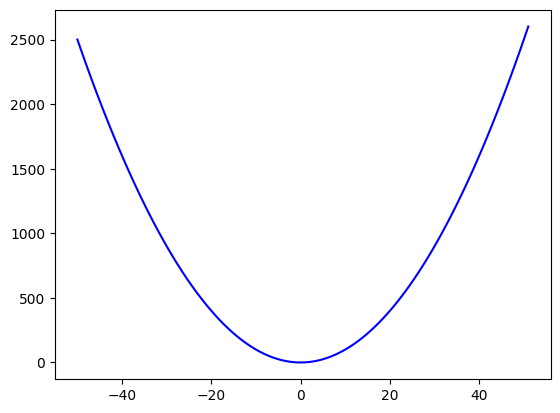

In [45]:
import matplotlib.pyplot as plt

X = np.linspace(-50, 51, 100)
Y = X**2

plt.plot(X, Y, color='blue')
plt.show()

## 5 数组的轴 axis

在 NumPy 中，数组的轴是指数组的维度。例如，一个一维数组有一个轴，一个二维数组有两个轴，一个三维数组有三个轴，以此类推。

每个轴都有一个长度，用于表示该轴上的元素数目。在二维数组中，第一个轴表示行数，第二个轴表示列数。在三维数组中，第一个轴表示层数，第二个轴表示行数，第三个轴表示列数。在更高维度的数组中，每个轴的含义也可以类似地定义。

在 NumPy 中，可以使用轴来操作数组的不同维度。例如，可以使用 `np.sum()` 函数来计算数组的总和，可以指定 `axis` 参数来沿着指定的轴对数组进行求和。这样可以方便地对数组进行各种不同的运算。

In [57]:
arr_2d = np.random.randint(10, size=(4,3))
arr_2d

array([[8, 6, 5],
       [9, 4, 4],
       [7, 0, 2],
       [7, 7, 1]])

In [58]:
# 二维数组的 0 轴为列
np.sum(arr_2d, axis=0)

array([31, 17, 12])

In [59]:
# 二维数组的 1 轴为行
np.sum(arr_2d, axis=1)

array([19, 17,  9, 15])

从上面的结果可以得知，在一个形状为 (a, b) 的二维数字，沿 0 轴进行聚合，得到的结果形状为 (b, ); 沿 1 轴聚合，结果形状为 (a, )

对于形状为 (a, b, c) 的三维数组，沿 0 轴聚合后，形状为 (b, c); 沿 1 轴形状为 (a, c); 沿 2 轴为 (b, c); 沿 3 轴为 (a, b)

In [60]:
# 形状为 (2,3,4)
arr_3d = np.arange(24).reshape(2,3,4)
arr_3d

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [62]:
# 结果形状为 (3,4)
np.max(arr_3d, axis=0)

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [63]:
# 结果形状为 (2, 4)
np.max(arr_3d, axis=1)

array([[ 8,  9, 10, 11],
       [20, 21, 22, 23]])

In [64]:
# 结果形状为 (2, 3)
np.max(arr_3d, axis=2)

array([[ 3,  7, 11],
       [15, 19, 23]])